In [2]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim
import torchvision
from torchvision import datasets, models
from torchvision import transforms as T
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import pandas as pd
from skimage import io, transform
import matplotlib.image as mpimg
from PIL import Image
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F
import scipy
import random
import pickle
import scipy.io as sio
import torch.nn.init as I

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.ion()

from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from skimage import io
import torch
from torchvision import transforms
import torchvision
from skimage import color
from torch.optim import lr_scheduler
from torchvision.utils import make_grid
import nibabel
import scipy.io as sio

In [3]:
from scipy.misc import imresize

In [4]:
import pickle
def pickling(file,path):
    pickle.dump(file,open(path,'wb'))
def unpickling(path):
    file_return=pickle.load(open(path,'rb'))
    return file_return

In [5]:
# patients = ["1003_3","1004_3","1005_3","1018_3","1019_3","1023_3","1024_3","1025_3","1038_3","1039_3"]

In [6]:
path = "/gpfs/data/cbi/hcp/hcp_seg/data_manual_extract/test/"

In [7]:
patients = os.listdir(path)

In [8]:
# available_segments = [  0,   45,   430,   52,   50,   41,   39,  60,  37,  58,  56,  4,  11,
#        35,  48,  32,  46,  30,  62,  64,  310,  44,  420,  51,  49,  40,
#        38,  59,  36,  57,  55,  47,  31,  23,  61,  63,  630,  15,  770,
#        800,  69, 2510, 2520, 2530, 2540, 2550]

In [9]:
available_segments = [0, 45, 52, 50, 41, 39, 60, 37, 58, 56, 4, 11,
                 35, 48, 32, 46, 30, 62, 64, 44, 51, 49, 40,
                 38, 59, 36, 57, 55, 47, 31, 23, 61, 63, 15, 69]

In [10]:
# rest_available = [  45,   430,   52,   50,   41,   39,  60,  37,  58,  56,  4,  11,
#        35,  48,  32,  46,  30,  62,  64,  310,  44,  420,  51,  49,  40,
#        38,  59,  36,  57,  55,  47,  31,  23,  61,  63,  630,  15,  770,
#        801,  69, 2510, 2520, 2530, 2540, 2550]

In [11]:
rest_available = [45, 52, 50, 41, 39, 60, 37, 58, 56, 4, 11,
                 35, 48, 32, 46, 30, 62, 64, 44, 51, 49, 40,
                 38, 59, 36, 57, 55, 47, 31, 23, 61, 63, 15, 69]

In [12]:
# selected_seg = np.array(rest_available) < 300

In [13]:
num_seg = len(rest_available)+1

In [14]:
man_segs = pd.read_csv("manual_seg_names.csv")

In [15]:
man_segs.shape

(32, 2)

In [16]:
# sum(selected_seg)

In [17]:
# for i,j in man_segs.iterrows():
#     print(j["labels"],j["number"])

In [18]:
#exact_segs = [45,52,41,60,37,58,56,4,11,35,48,32,62,44,51,40,59,36,57,55,47,31,61]
exact_segs = [45,52,41,39,60,37,58,56,4,11,35,48,32,62,44,51,40,38,59,36,57,55,47,31,61]
mask_exact_segs = []
for sg in np.array(rest_available):
    if sg in exact_segs:
        mask_exact_segs.append(True)
    else:
        mask_exact_segs.append(False)

In [19]:
len(exact_segs)

25

In [20]:
x_coordinate = np.zeros((256,256))
for i in range(256):
    x_coordinate[i:] = [i]*256    
y_coordinate = x_coordinate.copy()
y_coordinate = y_coordinate.T

x_coordinate = x_coordinate/255
y_coordinate = y_coordinate/255

In [99]:
# x = sio.loadmat(path+"1003_3/Segmentation/image100.mat")['img'][:,:,20:276]
x = sio.loadmat("/gpfs/data/cbi/hcp/hcp_seg/data_manual/manual_data_2/train_mat_files/1000_3.mat")['label']
# ['img']

In [100]:
# x

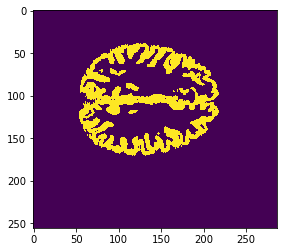

In [101]:
plt.imshow(x[:,100,:]>100)

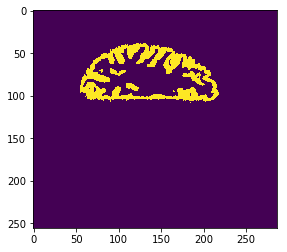

In [130]:
plt.imshow(np.logical_and(x[:,100,:]>=100,x[:,100,:]%2==0))

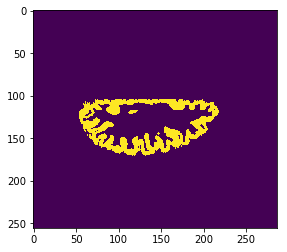

In [131]:
plt.imshow(np.logical_and(x[:,100,:]>=100,x[:,100,:]%2!=0))

In [103]:
np.unique(x)

array([  0,   4,  11,  15,  23,  30,  31,  32,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  69,  71,  72,
        73,  75,  76, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 128, 129, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182,
       183, 184, 185, 186, 187, 190, 191, 192, 193, 194, 195, 196, 197,
       198, 199, 200, 201, 202, 203, 204, 205, 206, 207], dtype=int16)

In [104]:
len(np.unique(x))

140

In [34]:
class BrainImages(Dataset):
    def __init__(self, image_dir, label_dir,rest_available_x, train_data = False, flipping = True, rotation = True, translation = True, \
                 coord = True):
        
        self.image_dir = image_dir
        self.label_dir = label_dir
        self.flipping = flipping
        self.rotation = rotation
        self.translation = translation
        self.train_data = False
        self.coord = coord
        self.rest_available_x = rest_available_x

    def __len__(self):
        return len(self.image_dir)

    def __getitem__(self,idx):
        image_path = self.image_dir[idx]
        aseg_path = self.label_dir[idx]
        
#         print("hey")
#         img_orig = nibabel.freesurfer.mghformat.MGHImage.from_filename(image_path)
#         image = img_orig.get_data().astype(np.float64)
        image = sio.loadmat(image_path)['img']
#         image = imresize(image[0,:,:],(256,256)).reshape((1,256,256))
#         print(image.shape)
#         print(image.shape)
#         aseg_img = nibabel.freesurfer.mghformat.MGHImage.from_filename(aseg_path)
#         aseg_img = aseg_img.get_data().astype(np.float64)[:,:,20:276]
#         print(aseg_img.shape)
        aseg_img = sio.loadmat(aseg_path)['img']
    
        if image.shape[2]>295:
            image = image[:,:,20:276]
            aseg_img = aseg_img[:,:,20:276]
        else:
            image = image[:,:,:256]
            aseg_img = aseg_img[:,:,:256]


#         aseg_img = imresize(aseg_img[0,:,:],(256,256)).reshape((1,256,256))
        flip = random.random() > 0.5
        angle = random.uniform(-5,5)
        dx = np.round(random.uniform(-10,10))
        dy = np.round(random.uniform(-10,10))
        
        im = Image.fromarray(image[0])
        target = Image.fromarray(aseg_img[0])
        if self.train_data:
            if self.flipping and flip:
                im = im.transpose(0)
                target = target.transpose(0)
            if self.rotation:
                im = im.rotate(angle)
                target = target.rotate(angle)
            if self.translation:
                im = im.transform((256,256),0, (1,0,dx,0,1,dy))
                target = target.transform((256,256),0,(1,0,dx,0,1,dy))
                
#        im = torch.from_numpy(np.array(im, np.float64, copy=False).reshape((1,256,256)))/255
        im = np.array(im, np.float64, copy=False)
        min_im = np.min(im)
        max_im = np.max(im)
        im = (im - min_im)/(max_im - min_im + 1e-4)
#         print(np.unique(target))
#         print(len(np.unique(target)))
        if self.coord:
            im = np.array([im, x_coordinate, y_coordinate], np.float64, copy=False)
            im = torch.from_numpy(im).type(torch.FloatTensor)
        else:
            im = torch.from_numpy(im).type(torch.FloatTensor).unsqueeze(0)
#         print("got?")
        
        last_dim = im.size(2)
        target = np.array(target, np.float64, copy=False)
        target_label = np.zeros((len(self.rest_available_x)+1,256,last_dim))
        for i,a in enumerate(available_segments):
            temp = (target==a).astype(int)
            if a in self.rest_available_x:
                target_label[self.rest_available_x.index(a),:,:] = temp
            else:
                target_label[len(self.rest_available_x),:,:] = target_label[len(self.rest_available_x),:,:] + temp
        target_label[len(self.rest_available_x),:,:] = (target_label[len(self.rest_available_x),:,:]>=1).astype(int) 
#        print(target_label.shape)
        target_label = torch.from_numpy(target_label).type(torch.FloatTensor)
        sample = {'x':im,'y':target_label} 
        return sample
#         return 0

In [35]:
full_val_raw = []
full_val_seg = []
for p in patients:
    val_raw = os.listdir(path + p + "/Data_orig/")
    for i in range(len(val_raw)):
        val_raw[i] = path + p + "/Data_orig/"+val_raw[i]
    full_val_raw.append(val_raw)
        
    val_seg = os.listdir(path + p + "/Segmentation/")
    for i in range(len(val_seg)):
        val_seg[i] = path + p + "/Segmentation/"+val_seg[i]
    full_val_seg.append(val_seg)

In [36]:
# len(full_val_raw[0])

In [37]:
# full_val_raw = os.listdir(path+"Data_orig/")
# for i in range(len(full_val_raw)):
#     full_val_raw[i] = path+"Data_orig/"+full_val_raw[i]

In [38]:
# full_val_seg = os.listdir(path+"Segmentation/")
# for i in range(len(full_val_seg)):
#     full_val_seg[i] = path+"Segmentation/"+full_val_seg[i]

In [39]:
# for i in range(256):
#     print(i,full_val_raw[i]),print(full_val_seg[i])

In [40]:
# train_subjects = unpickling("train_subject_index")
# val_subjects = unpickling("val_subject_index")
# test_subjects = unpickling("test_subject_index")

In [41]:
# full_train_raw = list(file_names.iloc[train_subjects,2])
# full_train_seg = list(file_names.iloc[train_subjects,3])

# full_val_raw = list(file_names.iloc[val_subjects,2])
# full_val_seg = list(file_names.iloc[val_subjects,3])

# full_test_raw = list(file_names.iloc[test_subjects,2])
# full_test_seg = list(file_names.iloc[test_subjects,3])

In [42]:
cd = False
transformed_dataset = {'validate': BrainImages(np.array(full_val_raw[0]),np.array(full_val_seg[0]),rest_available, coord = cd)
                                               }
bs = 15
dataloader = {x: DataLoader(transformed_dataset[x], batch_size=bs,
                        shuffle=False, num_workers=0) for x in ['validate']}
data_sizes ={x: len(transformed_dataset[x]) for x in ['validate']}

In [43]:
orig_data = next(iter(dataloader['validate']))

In [44]:
orig_data['y'].size()

torch.Size([15, 35, 256, 256])

In [45]:
orig_data['x'][5,0,:,:].shape

torch.Size([256, 256])

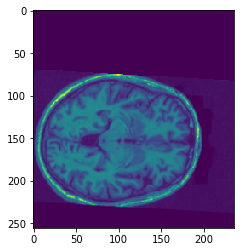

In [46]:
plt.imshow(orig_data['x'][5,0,:,20:276])

In [47]:
class Downsample_block(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Downsample_block, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)
    
    def forward(self,x):
        x = F.relu(self.bn1(self.conv1(x)))
        y = F.relu(self.bn2(self.conv2(x)))
        x = F.max_pool2d(y, 2,stride = 2)
        
        return x, y

In [48]:
class Upsample_block(nn.Module):
    def __init__(self,in_channels, out_channels):
        super(Upsample_block, self).__init__()
        self.transconv = nn.ConvTranspose2d(in_channels, out_channels, 4, padding = 1, stride = 2)
        self.conv1 = nn.Conv2d(in_channels, out_channels, 3, padding = 1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
    def forward(self,x, y):
        x = self.transconv(x)
        x = torch.cat((x,y),dim = 1)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        
        return x

In [49]:
class Upsample_block_small(nn.Module):
    def __init__(self,in_channels, out_channels, dropout = False):
        super(Upsample_block_small, self).__init__()
        self.transconv = nn.ConvTranspose2d(in_channels, out_channels, 4, padding = 1, stride = 2)
        self.conv1 = nn.Conv2d(2*in_channels, out_channels, 3, padding = 1)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, 3, padding = 1)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.dp = dropout
        
    def forward(self,x, y):
        x = self.transconv(x)
        if self.dp:
            y = F.dropout2d(y)
        x = torch.cat((x,y),dim = 1)
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        
        return x

In [50]:
class Unet_small(nn.Module):
    def __init__(self, in_layers, out_layers, int_var = 64, dropout = False):
        super(Unet_small, self).__init__()
        self.down1 = Downsample_block(in_layers,int_var)
        self.down2 = Downsample_block(int_var,int_var)
        self.down3 = Downsample_block(int_var,int_var)
        self.down4 = Downsample_block(int_var,int_var)
        self.conv1 = nn.Conv2d(int_var,int_var, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(int_var)
        self.conv2 = nn.Conv2d(int_var,int_var,3, padding = 1)
        self.bn2 = nn.BatchNorm2d(int_var)
        self.up4 = Upsample_block_small(int_var,int_var)
        self.up3 = Upsample_block_small(int_var,int_var)
        self.up2 = Upsample_block_small(int_var,int_var, dropout=dropout)
        self.up1 = Upsample_block_small(int_var,int_var, dropout=dropout)
        self.outconv = nn.Conv2d(int_var,out_layers, 1)
        
    def forward(self,x):
        x, y1 = self.down1(x)
        x, y2 = self.down2(x)
        x, y3 = self.down3(x)
        x, y4 = self.down4(x)
        x = F.dropout2d(F.relu(self.bn1(self.conv1(x))))
        x = F.dropout2d(F.relu(self.bn2(self.conv2(x))))
        x = self.up4(x, y4)
        x = self.up3(x, y3)
        x = self.up2(x, y2)
        x = self.up1(x, y1)
        x = self.outconv(x)
        
        return x

In [51]:
class Unet(nn.Module):
    def __init__(self,in_chan = 3, out_chan = 3):
        super(Unet, self).__init__()
        self.down1 = Downsample_block(in_chan,64)
        self.down2 = Downsample_block(64,128)
        self.down3 = Downsample_block(128,256)
        self.down4 = Downsample_block(256,512)
        self.conv1 = nn.Conv2d(512,1024, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(1024)
        self.conv2 = nn.Conv2d(1024,1024,3, padding = 1)
        self.bn2 = nn.BatchNorm2d(1024)
        self.up4 = Upsample_block(1024,512)
        self.up3 = Upsample_block(512,256)
        self.up2 = Upsample_block(256,128)
        self.up1 = Upsample_block(128,64)
        self.outconv = nn.Conv2d(64,out_chan, 1)
        
    def forward(self,x):
        x, y1 = self.down1(x)
        x, y2 = self.down2(x)
        x, y3 = self.down3(x)
        x, y4 = self.down4(x)
        x = F.dropout2d(F.relu(self.bn1(self.conv1(x))))
        x = F.dropout2d(F.relu(self.bn2(self.conv2(x))))
        x = self.up4(x, y4)
        x = self.up3(x, y3)
        x = self.up2(x, y2)
        x = self.up1(x, y1)
        x = self.outconv(x)
        
        return x

In [52]:
def visualize1(image,num_seg):
    p = F.softmax(image,dim = 1)
    p_maxim = (torch.max(p, dim=1)[1]).cpu().data.numpy()
    img = []
    for seg in range(num_seg):
        masked = np.expand_dims((p_maxim==seg).astype(float),axis = 1)
        img.append(masked)
    return np.concatenate(img,axis = 1)

In [53]:
def dice_score(pred,gt, ep= 1e-4):
    N,C,sh1,sh2 = pred.shape
#     print(pred.shape)
#     print(gt.shape)
    score_list = []
    for i in range(C):
        num = 2*(np.sum(pred[:,i,:,:]*gt[:,i,:,:])) + ep
        denom = np.sum(pred[:,i,:,:] + gt[:,i,:,:]) + ep
        score = num/denom
        score_list.append(score)
    count = np.sum(np.transpose(gt,axes = (1,0,2,3)).reshape(C,-1),axis = 1)
    return score_list,count

In [54]:
from sklearn.metrics import f1_score
def dice_score_overall(pred,gt):
#     N,C,sh1,sh2 = pred.shape
#     pred = np.sum(pred,axis =1)
#     gt = np.sum(gt,axis = 1)
    pred_1d = pred.reshape(-1)
    gt_1d = gt.reshape(-1)
    f1_s = f1_score(gt_1d,pred_1d)
#     print(pred.shape)
#     print(gt.shape)
    return f1_s

In [55]:
model_1 = torch.load("file_tined_pre_trained_lr_5e-5")
model_1 = nn.DataParallel(model_1.module).cuda()
model_1.eval()

DataParallel(
  (module): Unet(
    (down1): Downsample_block(
      (conv1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (down2): Downsample_block(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (down3): Downsample_block(
      (conv1): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [56]:
dc_score_list = []
count_list = []
time_list = []
dice_score_overall_list = []
for i in range(10):
    print(i)
    start = time.time()
    cd = False
    transformed_dataset = {'validate': BrainImages(np.array(full_val_raw[i]),np.array(full_val_seg[i]),\
                                                   rest_available, coord = cd)
                                                   }
    bs = 1
    dataloader = {x: DataLoader(transformed_dataset[x], batch_size=bs,
                            shuffle=False, num_workers=0) for x in ['validate']}
    data_sizes ={x: len(transformed_dataset[x]) for x in ['validate']}
    output_1 = []
    true_1 = []
    for data in dataloader['validate']:
        x = Variable(data['x']).cuda()
        y = data['y'].numpy()
        out = model_1(x)
        segs = out.size()[1]
        pred = visualize1(out,segs)
        output_1.append(pred[:,:-1,:,:])
        true_1.append(y[:,:-1,:,:])
        
    output = np.concatenate(output_1,axis = 0)
    
    true = np.concatenate(true_1,axis = 0)
    
    dc,count_seg = dice_score(output,true)
#     dc_overall = dice_score_overall(output,true)
    dc_score_list.append(dc)
    count_list.append(count_seg)
#     dice_score_overall_list.append(dc_overall)
    end = time.time()
    total_time = end - start
    time_list.append(total_time)

0
1
2
3
4
5
6
7
8
9


In [70]:
%matplotlib inline
def show(img):
    
    npimg = img.numpy()
    #print(npimg.shape)
    plt.figure(figsize = (20,20))
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    plt.show()

In [71]:
np.mean(time_list)

23.031299567222597

In [72]:
dc_score_list_np = np.vstack(dc_score_list)
dc_score_list_np.shape

(10, 34)

In [73]:
dc_score_list_np[:,mask_exact_segs][0].shape

(25,)

In [74]:
dc_score_list_np_c = dc_score_list_np.copy()
dc_score_list_np = dc_score_list_np_c[:,mask_exact_segs]
#[mask_exact_segs]

In [75]:
dc_score_list_np.shape

(10, 25)

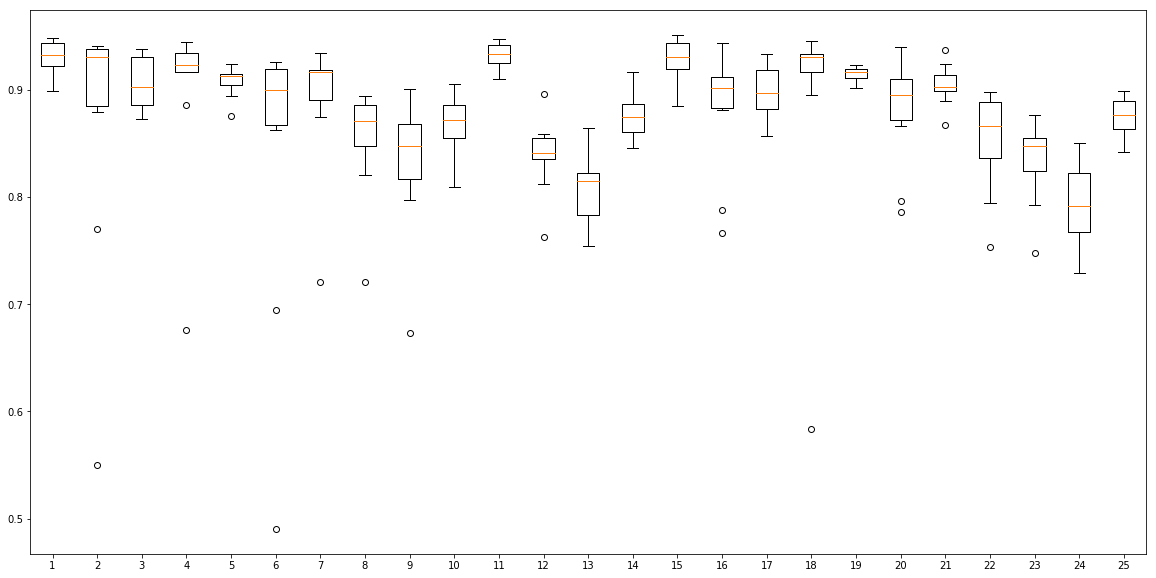

In [76]:
plt.figure(figsize = (20,10))
plt.boxplot(dc_score_list_np)
plt.show()

In [77]:
mean_dc_score = np.mean(dc_score_list_np,axis = 0)
mean_dc_score.shape

(25,)

In [78]:
mean_dc_score

array([0.92920403, 0.87195101, 0.90587242, 0.89885828, 0.90780015,
       0.84108342, 0.89157996, 0.85392252, 0.83090191, 0.86503495,
       0.93125327, 0.83857083, 0.80539746, 0.87585088, 0.92810737,
       0.88277625, 0.89832681, 0.89241665, 0.9144403 , 0.88009923,
       0.90449314, 0.85214004, 0.83373784, 0.79319736, 0.8739471 ])

In [79]:
# pickle.dump(mean_dc_score)

In [82]:
np.mean(mean_dc_score)

0.8760385268948556

In [83]:
np.mean(dc_score_list_np[:,mean_dc_score>0.2])

0.8760385268948558

In [98]:
np.std(mean_dc_score)

0.03680566283098566

In [97]:
pickle.dump(dc_score_list_np,open("file_tined_pre_trained_lr_5e-5_dice_manual",'wb'))

In [84]:
count_list_np = np.mean(np.vstack(count_list),axis = 0)[mask_exact_segs]

In [85]:
count_list_all_np = np.vstack(np.array(count_list)[:,mask_exact_segs])
count_list_all_np.shape

(10, 25)

In [86]:
# count_list_all_np = count_list_all_np[:,selected_seg][:,mask_exact_segs]
dc_score_list_np.shape

(10, 25)

In [87]:
overall_dc_score = np.sum(count_list_all_np * dc_score_list_np)/np.sum(count_list_all_np)

In [88]:
ods_all_sub = np.sum(count_list_all_np * dc_score_list_np, axis = 1)/np.sum(count_list_all_np, axis = 1)

In [89]:
ods_all_sub.shape

(10,)

In [90]:
np.mean(ods_all_sub)

0.9145674247066837

In [91]:
np.std(ods_all_sub)

0.025405447907146734

In [92]:
overall_dc_score

0.9137777630695907

No handles with labels found to put in legend.


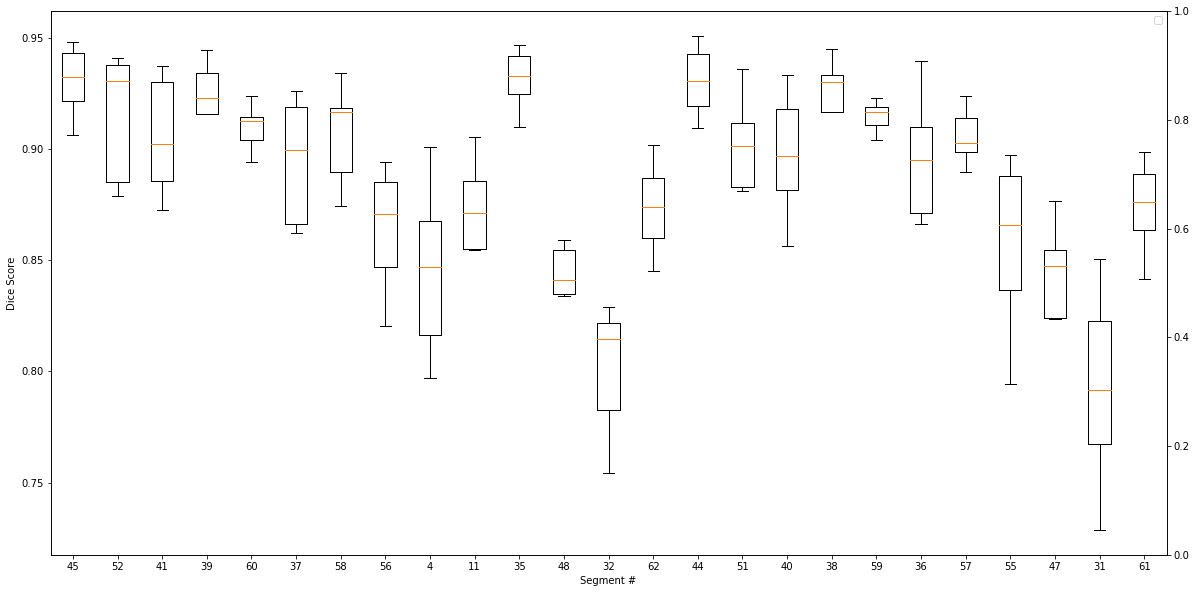

In [93]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.boxplot(dc_score_list_np, labels = np.array(rest_available)[mask_exact_segs],showfliers = False,whis = 1.0)
#ax1.plot(np.arange(1,26),[overall_dc_score]*25,'-r',label = 'Overall Dice Score')
ax1.set_xlabel('Segment #')
ax1.set_ylabel('Dice Score')
ax2 = ax1.twinx()
# ax2.plot(np.arange(1,26),np.log10(count_list_np), label = 'Log(Voxel Count)')
# ax2.set_ylabel('Log(Voxels)')
plt.legend()
plt.show()

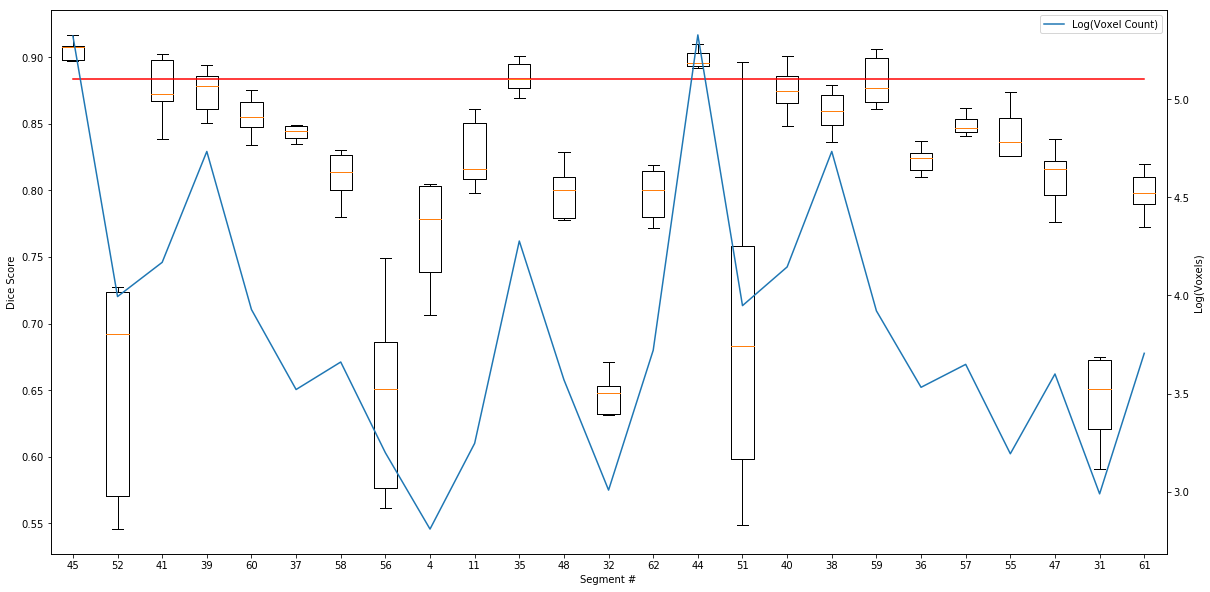

In [211]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.boxplot(dc_score_list_np[:,mean_dc_score>0], labels = np.array(rest_available)[selected_seg][mask_exact_segs],showfliers = False,whis = 1.0)
ax1.plot(np.arange(1,26),[overall_dc_score]*25,'-r',label = 'Overall Dice Score')
ax1.set_xlabel('Segment #')
ax1.set_ylabel('Dice Score')
ax2 = ax1.twinx()
ax2.plot(np.arange(1,26),np.log10(count_list_np)[mean_dc_score>0], label = 'Log(Voxel Count)')
ax2.set_ylabel('Log(Voxels)')
plt.legend()
plt.show()

In [71]:
filt_dc_score = dc_score_list_np[:,mean_dc_score>0.5]
filt_labels = np.array(rest_available)[selected_seg][mean_dc_score>0.5]
filt_count = np.log10(count_list_np)[mean_dc_score>0.5]

In [72]:
seg_labels,count = np.unique(filt_labels,return_counts=True)

In [73]:
rep_seg = seg_labels[count==2]

In [74]:
rep_seg

array([], dtype=int64)

In [75]:
final_dc_scores = []
final_labels = []
final_count = []
for i in seg_labels:
    temp_dc = np.squeeze(filt_dc_score[:,filt_labels == i])
    try:
        if temp_dc.shape[1]>1:
            means = np.mean(temp_dc,axis = 0)
            temp_dc = temp_dc[:,np.argmax(means)]
    except:
        None
    final_dc_scores.append(temp_dc)
    final_labels.append(i)
    final_count.append(np.max(filt_count[filt_labels==i]))
final_dc_scores = np.vstack(final_dc_scores).T
final_labels = np.array(final_labels)
final_count = np.array(final_count)

In [76]:
final_dc_scores.shape

(10, 27)

In [77]:
final_labels

array([ 4, 11, 15, 23, 30, 31, 32, 35, 36, 37, 40, 41, 44, 45, 46, 47, 48,
       51, 52, 55, 56, 57, 58, 59, 60, 61, 62])

In [78]:
final_count

array([2.809627 , 3.246597 ,      -inf, 2.7428036, 2.7727616, 2.9891381,
       3.0082595, 4.2771573, 3.5319767, 3.5206406, 4.145125 , 4.1685743,
       5.3272157, 5.3220334, 2.9994786, 3.5998285, 3.5702627, 3.9479775,
       3.994216 , 3.1934865, 3.1985745, 3.6487405, 3.6608086, 3.9214158,
       3.928186 , 3.7051792, 3.720738 ], dtype=float32)

In [79]:
names = pd.read_csv('labels_list.csv')
names = np.array(names)

In [80]:
# names

In [81]:
final_word_labels = []
for i in final_labels:
    final_word_labels.append(names[names[:,0]==i][0,1])
final_word_labels = np.array(final_word_labels)

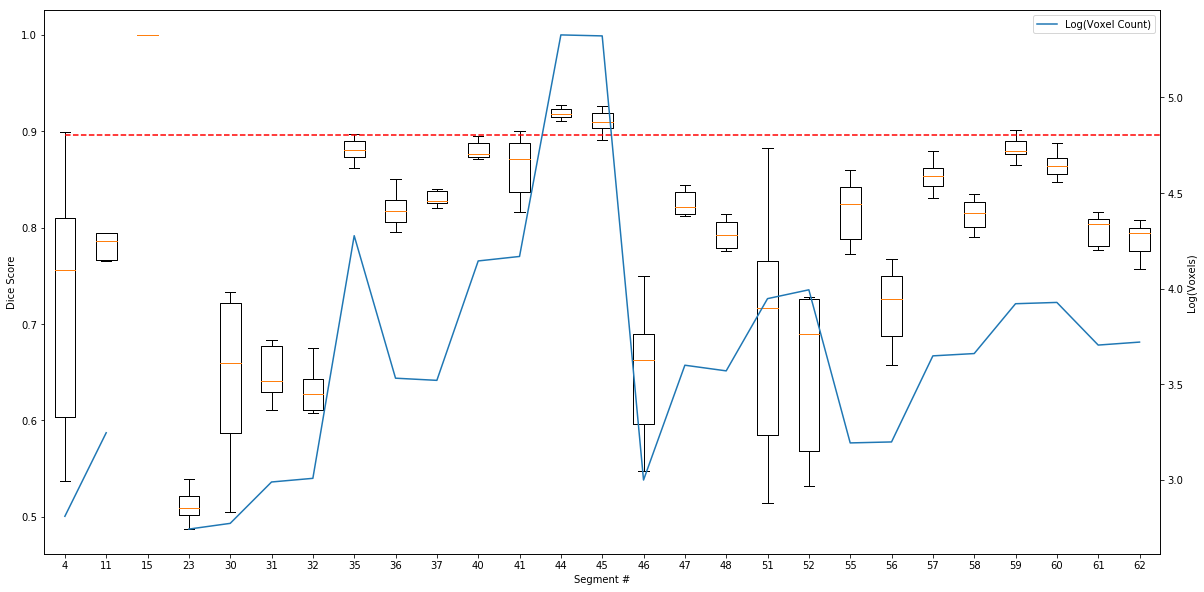

In [82]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax1.boxplot(final_dc_scores, labels = final_labels,showfliers = False,whis = 1.0)
ax1.plot(np.arange(1,58),[overall_dc_score]*57,'--r',label = 'Overall Dice Score',)
ax1.set_xlabel('Segment #')
ax1.set_ylabel('Dice Score')
ax2 = ax1.twinx()
ax2.plot(np.arange(1,final_count.shape[0]+1),final_count, label = 'Log(Voxel Count)')
ax2.set_ylabel('Log(Voxels)')
plt.legend()
plt.show()

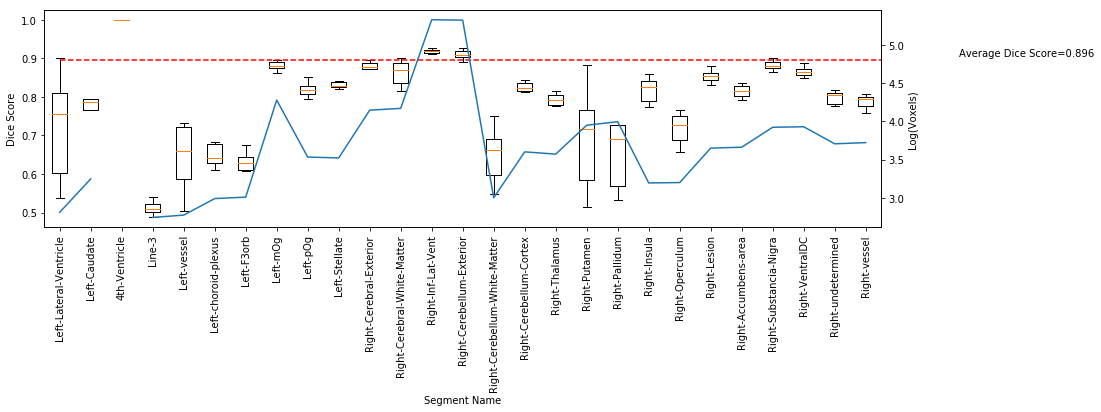

In [83]:
fs = 10
fig, ax1 = plt.subplots(figsize=(15,4))
ax1.boxplot(final_dc_scores,showfliers = False,whis = 1.0,manage_xticks = True)
p1 = ax1.plot(np.arange(1,58),[overall_dc_score]*57,'--r',label = 'Overall Average Dice Score',)
plt.text(30,overall_dc_score+0.01,'Average Dice Score=%.3f' % overall_dc_score,fontsize=fs)
ax1.set_xticklabels(final_word_labels,rotation=90, fontsize=fs)
ax1.set_xlabel('Segment Name',fontsize=fs)
ax1.set_ylabel('Dice Score',fontsize=fs)
ax2 = ax1.twinx()
p2 = ax2.plot(np.arange(1,final_count.shape[0]+1),final_count, label = 'Log(Voxel Count)')
ax2.set_ylabel('Log(Voxels)',fontsize=fs)
p = p2
labs = [l.get_label() for l in p]
# ax1.legend(p, labs,fontsize=fs)
# ax1.legend(loc=0)
# ax2.legend()
plt.show()